In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

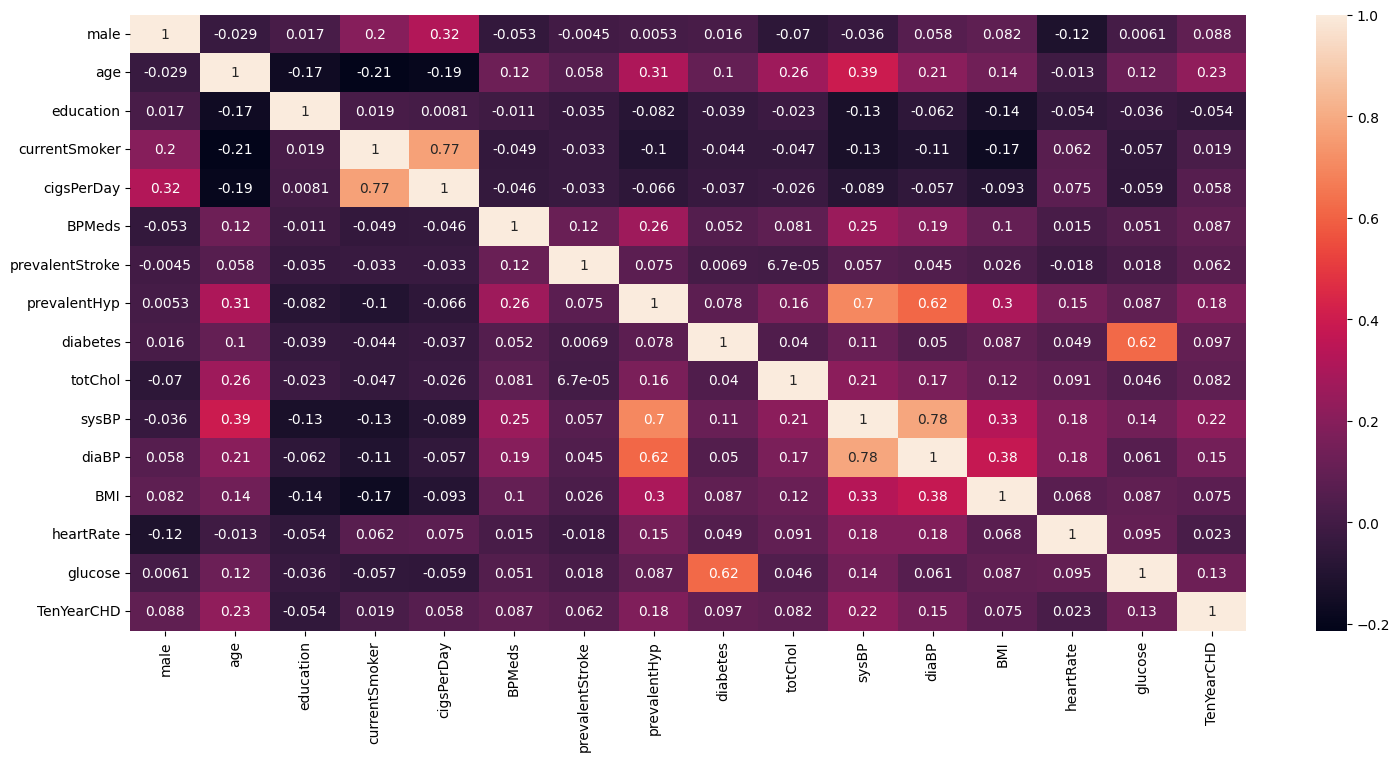

In [5]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='TenYearCHD', ylabel='count'>

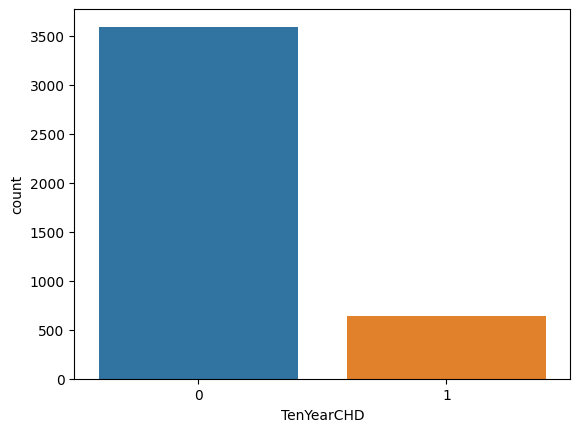

In [6]:
sns.countplot(x='TenYearCHD',data=df)

<Axes: xlabel='TenYearCHD', ylabel='age'>

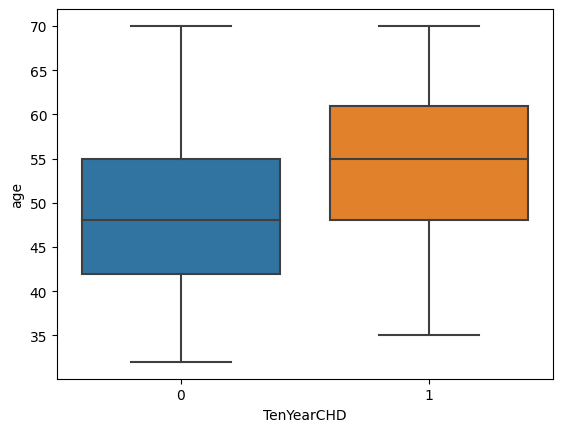

In [7]:
sns.boxplot(x='TenYearCHD',y='age',data=df)

<Axes: xlabel='TenYearCHD', ylabel='count'>

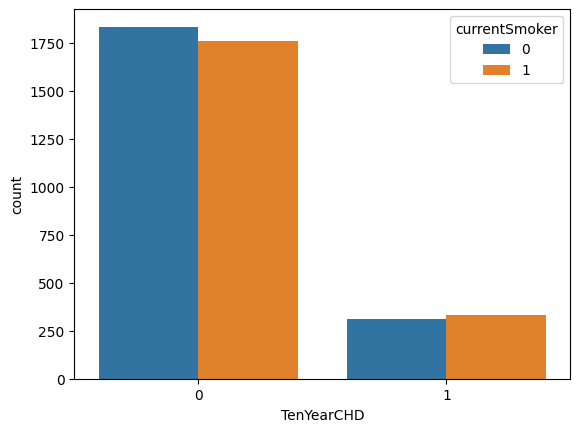

In [8]:
sns.countplot(x='TenYearCHD',hue='currentSmoker',data=df)

<Axes: xlabel='TenYearCHD', ylabel='cigsPerDay'>

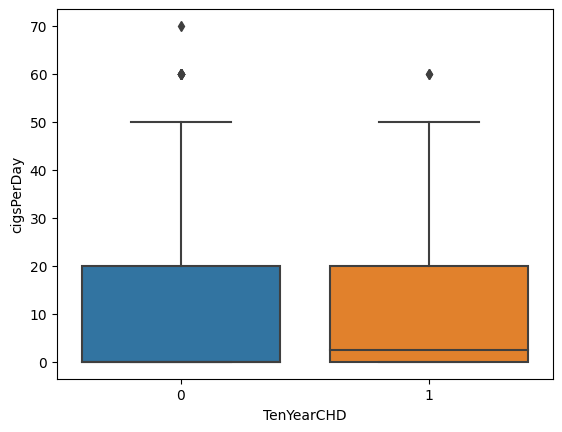

In [9]:
sns.boxplot(x='TenYearCHD',y='cigsPerDay',data=df)

<Axes: xlabel='TenYearCHD', ylabel='count'>

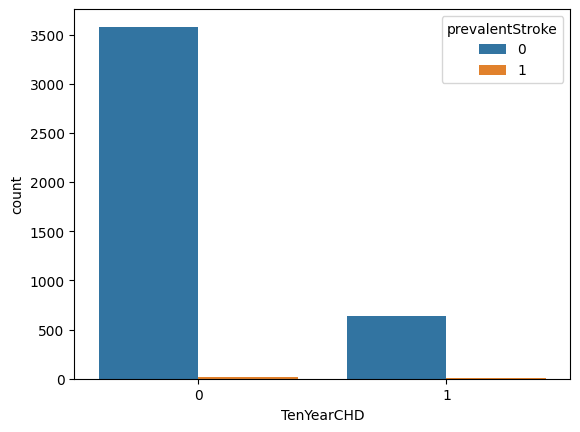

In [10]:
sns.countplot(x='TenYearCHD',hue='prevalentStroke',data=df)

<Axes: xlabel='TenYearCHD', ylabel='count'>

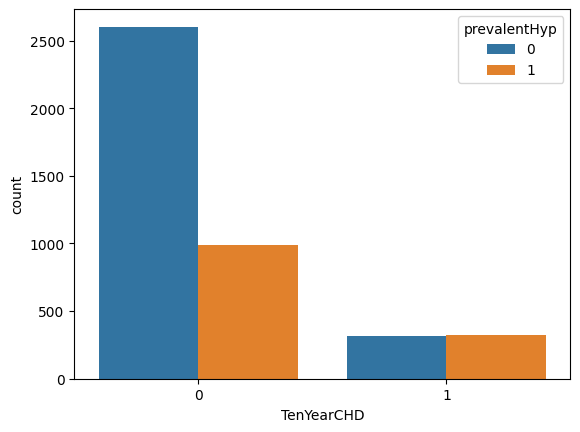

In [11]:
sns.countplot(x='TenYearCHD',hue='prevalentHyp',data=df)

<Axes: xlabel='TenYearCHD', ylabel='count'>

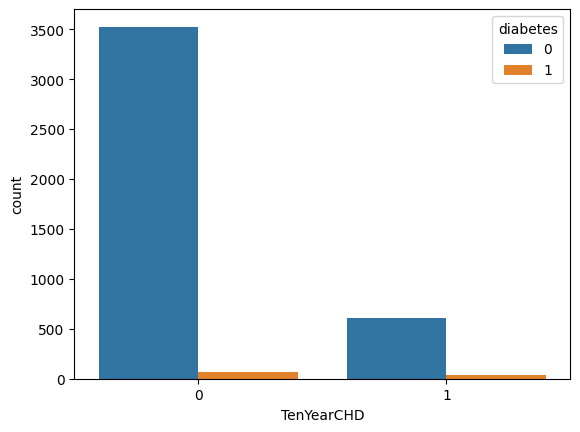

In [12]:
sns.countplot(x='TenYearCHD',hue='diabetes',data=df)

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

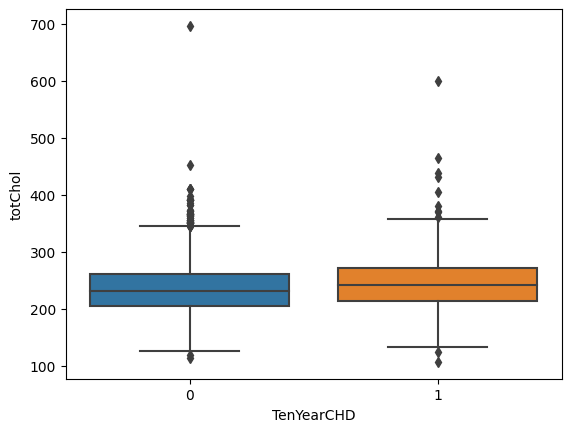

In [13]:
sns.boxplot(x='TenYearCHD',y='totChol',data=df)

<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

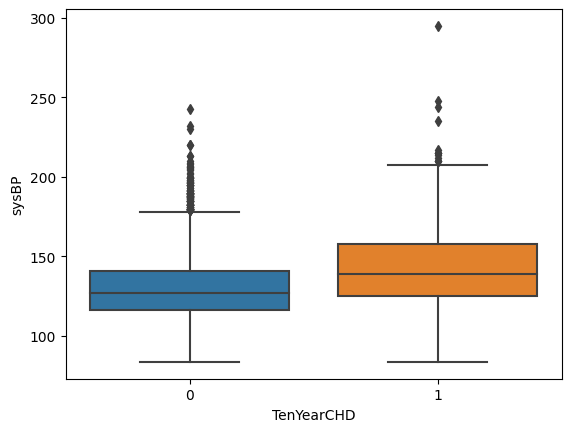

In [14]:
sns.boxplot(x='TenYearCHD',y='sysBP',data=df)

<Axes: xlabel='TenYearCHD', ylabel='diaBP'>

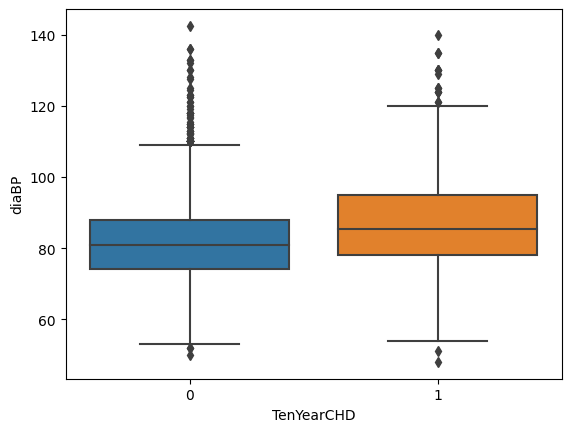

In [15]:
sns.boxplot(x='TenYearCHD',y='diaBP',data=df)

<Axes: xlabel='TenYearCHD', ylabel='BMI'>

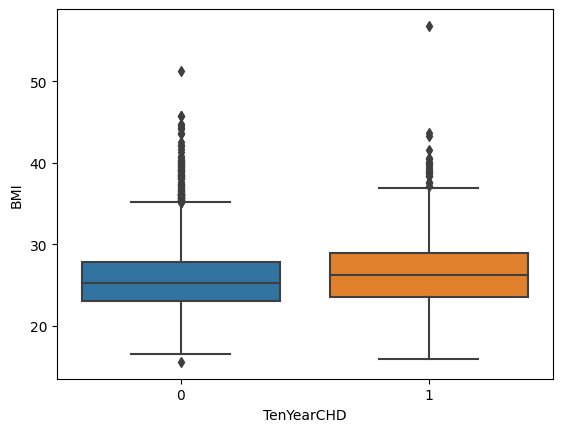

In [16]:
sns.boxplot(x='TenYearCHD',y='BMI',data=df)

<Axes: xlabel='TenYearCHD', ylabel='heartRate'>

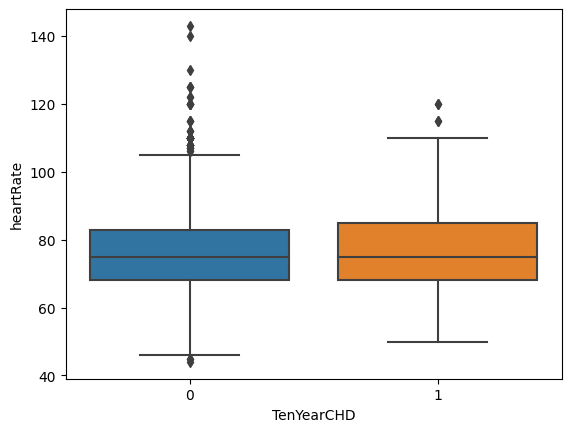

In [17]:
sns.boxplot(x='TenYearCHD',y='heartRate',data=df)

<Axes: xlabel='TenYearCHD', ylabel='glucose'>

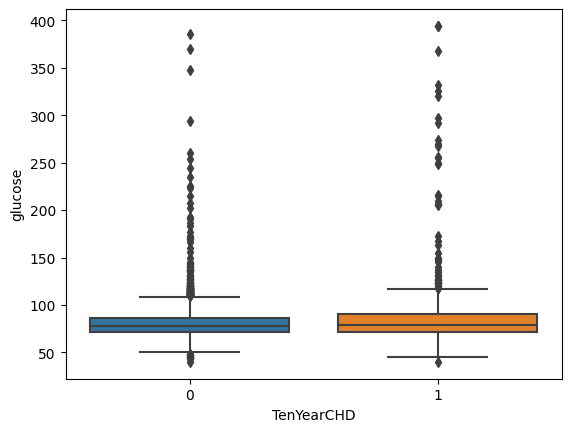

In [18]:
sns.boxplot(x='TenYearCHD',y='glucose',data=df)

In [19]:
df.isnull().sum() #how you will fill null values in the categry yes or no

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [20]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(9)
df['BPMeds'] = df['BPMeds'].fillna(0)
df['totChol'] = df['totChol'].fillna(236)
df['BMI'] = df['BMI'].fillna(25)
df['heartRate'] = df['heartRate'].fillna(75)



In [21]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
df = df.drop(['education','male','glucose'],axis=1)

In [23]:
df.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [24]:
X = df.drop(['TenYearCHD'],axis=1)
Y = df['TenYearCHD']

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=23)

In [26]:
log_reg = LogisticRegression()

In [27]:
log_reg.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
Y_pred = log_reg.predict(X_test)

In [29]:
log_reg.coef_

array([[ 3.10312517e-02, -4.08482316e-04,  1.96955680e-02,
         7.11520074e-01,  4.12675175e-01,  5.40737331e-01,
         1.15531831e+00, -2.01591394e-03,  1.57039965e-02,
        -7.81633380e-03, -6.11471569e-02, -1.48889182e-02]])

In [30]:
log_reg.intercept_

array([-2.04329934])

In [31]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_report_str = classification_report(Y_test, Y_pred)

In [32]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.8525943396226415
Precision: 0.6666666666666666
Recall: 0.031496062992125984
Confusion Matrix:
 [[719   2]
 [123   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       0.67      0.03      0.06       127

    accuracy                           0.85       848
   macro avg       0.76      0.51      0.49       848
weighted avg       0.83      0.85      0.79       848

